# Chapter :7 Hypothesis Testing


Objective: learn techniques to decide if apparent effects are significant. An apparent effect is statistically significant if it unlikely to have occurred by chance.

In [1]:
from __future__ import division, print_function
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline

## Testing a difference in means

In the NSFG data, we saw that the mean pregnancy length for first babies is slightly longer, and the mean weight at birth is slightly smaller. Now we will see if those effects are significant.

    H0: distribution of the two groups (first and other babies) are same



In [3]:
pregnancies = pd.read_fwf("/home/venkat/ThinkStats/2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,18.0,12999.542264


In [6]:
# Look at the input data
live_births = pregnancies[pregnancies["outcome"] == 1]
first_babies = np.array(live_births[live_births["birthord"] == 1]["prglength"].dropna())
other_babies = np.array(live_births[live_births["birthord"] != 1]["prglength"].dropna())
print("# first babies: %d, other babies: %d" % (first_babies.shape[0], other_babies.shape[0]))
delta = np.mean(first_babies) - np.mean(other_babies)
print("Difference in means (data): %.3f weeks" % (delta))

# first babies: 4413, other babies: 4735
Difference in means (data): 0.078 weeks


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


Text(0.5, 1.0, 'Resampled Differences')

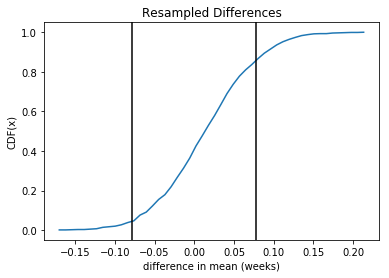

In [20]:
def compute_diff(model1, model2, replace=True):
    sample1 = np.random.choice(model1, size=model1.shape[0], replace=replace)
    sample2 = np.random.choice(model2, size=model2.shape[0], replace=replace)
    return np.mean(sample1) - np.mean(sample2)
    
# Generate 2 random samples with the mean and std of the pooled distributio
pooled_babies = np.array(pregnancies[pregnancies["outcome"] == 1]["prglength"].dropna())
sample_mean = np.mean(pooled_babies)
sample_std = np.std(pooled_babies)
np.random.seed(1)
sample_first = np.random.normal(sample_mean, sample_std, 4413)
sample_other = np.random.normal(sample_mean, sample_std, 4735)

# draw samples from sample_first and sample_other and compute diffs.
# create a distribution of diffs
diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])

diffs_pmf = np.histogram(diffs, bins=50, normed=True)
diffs_cdf_ps = np.cumsum(diffs_pmf[0])
diffs_cdf_ps = diffs_cdf_ps / diffs_cdf_ps[-1]
diffs_cdf_xs = diffs_pmf[1][:-1]

# CDF plot of distribution difference of means
plt.plot(diffs_cdf_xs, diffs_cdf_ps)
plt.axvline(x=-delta, color='k')
plt.axvline(x=delta, color='k')
plt.xlabel("difference in mean (weeks)")
plt.ylabel("CDF(x)")
plt.title("Resampled Differences")

In [8]:
# p-value = fraction of diffs sample where value >= delta
nbr_diffs_ge_delta = np.where(diffs >= delta)[0].shape[0]
print("p-value = %.3f" % (nbr_diffs_ge_delta / diffs.shape[0]))

p-value = 0.172


In [23]:
live_births["birthwgt"] = 16 * pregnancies["birthwgt_lb"] + pregnancies["birthwgt_oz"]
pooled = np.array(live_births["birthwgt"].dropna())
first = np.array(live_births[live_births["birthord"]==1])
other = np.array(live_births[live_births["birthord"]!=1])


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Resampled Differences')

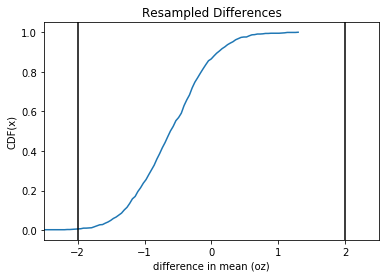

In [24]:
pooled_mean = np.mean(pooled)
pooled_std = np.std(pooled)
sample_first = np.random.normal(pooled_mean, pooled_std,first.shape[0])
sample_other = np.random.normal(pooled_mean, pooled_std, other.shape[0])

# create a distribution of diffs by sampling from the above samples many times
diffs = np.array([compute_diff(sample_first, sample_other, True) for x in range(1000)])

# plot the distribution
pmf_diffs = np.histogram(diffs, bins=100, normed=True)
cdf_diffs_ps = np.cumsum(pmf_diffs[0])
cdf_diffs_ps = cdf_diffs_ps / cdf_diffs_ps[-1]
cdf_diffs_xs = pmf_diffs[1][:-1]

plt.plot(cdf_diffs_xs, cdf_diffs_ps)
plt.xlim(-2.5, 2.5)
plt.axvline(x=-2.0, color='k')
plt.axvline(x=2.0, color='k')
plt.xlabel("difference in mean (oz)")
plt.ylabel("CDF(x)")
plt.title("Resampled Differences")


In [18]:
diffs_ge_2 = np.where(diffs >= 2)[0]
print("p-value = %.5f" % (diffs_ge_2.shape[0] / diffs.shape[0]))

p-value = 0.00300


## Choosing a threshold

Common threshold is $\alpha$ = 5%. If the p-value is less than $\alpha$, then difference is statistically significant, else it is not.

So the difference in pregnancy lengths is not statistically significant because 17.2% is greater than 5%, and the difference in birth weights is statistically significant because 1% is less than 5%.

Decreasing $\alpha$ decreases the chance of false positive. But it also raises the standard of evidence, which increases the chance of rejecting a valid hypothesis.

In [25]:
data_keep_fracs = [1.0, 0.5, 0.25, 0.33, 0.1, 0.05, 0.01, 0.005]
spvs = []
for data_keep_frac in data_keep_fracs:
    pool_sample = np.random.choice(pooled, int(pooled.shape[0] * data_keep_frac))
    pool_mean = np.mean(pool_sample)
    pool_std = np.std(pool_sample)
    first_sample = np.random.normal(pool_mean, pool_std, first.shape[0])
    other_sample = np.random.normal(pool_mean, pool_std, other.shape[0])
    diffs = np.array([compute_diff(first_sample, other_sample) for x in range(1000)])
    p_value = np.where(diffs >= 2.0)[0].shape[0] / diffs.shape[0]
    spvs.append((pool_sample.shape[0], p_value))
print("(sample size, p-value):", spvs)

(sample size, p-value): [(9087, 0.0), (4543, 0.0), (2271, 0.003), (2998, 0.019), (908, 0.002), (454, 0.015), (90, 0.0), (45, 0.0)]


## Defining the Effect

__Two sided test__ - check both sides when computing the p-value.

__One sided test__ - check only one side.

For symmetric distributions the two sided p-value should be roughly twice the one-sided value, but in this case, the distribution is skewed right.

In [26]:
p_value_2_sided = np.where((diffs >= 2.0) | (diffs <= -2.0))[0]
p_value_2_sided = p_value_2_sided.shape[0] / diffs.shape[0]
p_value_1_sided = np.where(diffs >= 2.0)[0]
p_value_1_sided = p_value_1_sided.shape[0] / diffs.shape[0]
print("p-value (1 sided): %.3f, (2 sided): %.3f" % (p_value_1_sided, p_value_2_sided))

p-value (1 sided): 0.000, (2 sided): 0.000


## Interpreting the result

We define event E, and compute the p-value, which is P(E|H0) and compare to the threshold $\alpha$.

__Classical:__ if p-value less than $\alpha$, we can conclude effect is __statistically significant__, but can't conclude that its real.

__Practical:__ in practice, people conclude its real. Lower the p-value, the higher the confidence in the conclusion.

__Bayesian:__ what we want to know is:

$$P(H_{A} | E) = \frac {P(E | H_{A}) P(H_{A})} {P(E)}$$

where $H_{A}$ is the alternate hypothesis that the effect is real. Here $P(H_{A})$ is the prior probability of $H_{A}$ before we see the effect, $P(E|H_{A})$ is the probability of seeing the effect assuming it is real, and P(E) is the probability of seeing E under any circumstances. Since the effect is either real or not real, P(E) is given by:

$$P(E) = P(E|H_{A})P(H_{A}) + P(E|H_{0})P(H_{0})$$



In [27]:
# assume H(A) = first and other distributions are different and the difference is 2.0
# compute P(E|HA)
np.random.seed(1)
first_sample = np.random.normal(pool_mean, pool_std, first.shape[0])
other_sample = np.random.normal(pool_mean, pool_std, other.shape[0])
diffs = np.array([compute_diff(first_sample, other_sample) for x in range(1000)])
diffs_ge_2 = np.where(diffs >= 2.0)
p_e_ha = diffs_ge_2[0].shape[0] / diffs.shape[0]
# prior P(HA) = P(H0) = 0.5 since we assume no knowledge
p_ha = 0.5
p_h0 = 0.5
# we already know H(E|H0) = 0.001 from before 
p_e_h0 = 0.001
p_ha_e = p_e_ha * p_ha / (p_e_ha * p_ha + p_e_h0 * p_h0)
print("posterior probability that birth weights are different: %.3f" % (p_ha_e))

posterior probability that birth weights are different: 0.750


## Cross-validation

Split the data into training and test OR partition and run over each partition, then average. Second method shown.

In [29]:
p_ha = 0.5
p_h0 = 0.5
p_e_h0 = 0.001
post_probs = []
np.random.seed(1)
for i in range(10):
    idxs = np.random.choice(pooled, size=8000)
    pool_split = pooled[np.array(idxs, dtype=int)]
    pool_mean = np.mean(pool_split)
    pool_std = np.mean(pool_split)
    first_sample = np.random.normal(pool_mean, pool_std, first.shape[0])
    other_sample = np.random.normal(pool_mean, pool_std, other.shape[0])
    diffs = np.array([compute_diff(first_sample, other_sample) for x in range(1000)])
    diffs_ge_2 = np.where(diffs >= 2.0)
    p_e_ha = diffs_ge_2[0].shape[0] / diffs.shape[0]
    post_probs.append(p_e_ha * p_ha / (p_e_ha * p_ha + p_e_h0 * p_h0))
print("posterior probability (averaged) = %.3f" % (sum(post_probs) / len(post_probs)))

posterior probability (averaged) = 0.988


## Chi-square test

Instead of testing whether the apparent difference in mean pregnancy length is significant or not, alternative is to test the hypothesis as it appears - ie, first babies are more likely to be early, less likely to be on time and more likely to be late.

Formula for chi-squared ratio is:

$$\chi^{2} = \sum_{i} \frac {(O_{i} - E_{i})^{2}}{E_{i}}$$

H0 = pregnancy length distribution is the same for both groups. The p-value is the probability of seeing a chi-squared value as high as the one observed.

observed chi-squared value: 92.12957072999355


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


Text(0, 0.5, 'cumulative probability')

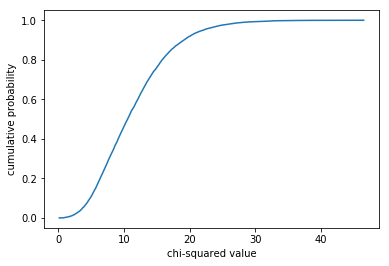

In [30]:
# (1) Find observed values and partition into 6 cells
#              |early  | on-time | late
# -------------+-------+---------+------
# first babies |       |         |
# others       |       |         |
observed = np.zeros(6)
observed[0] = len(live_births[(live_births["birthord"] == 1) & 
                              (live_births["prglength"] <= 37)]["prglength"].dropna())
observed[1] = len(live_births[(live_births["birthord"] == 1) & 
                              ((live_births["prglength"] == 38) |
                               (live_births["prglength"] == 39) |
                               (live_births["prglength"] == 40))]["prglength"].dropna())
observed[2] = len(live_births[(live_births["birthord"] == 1) & 
                              (live_births["prglength"] >= 41)]["prglength"].dropna())
observed[3] = len(live_births[(live_births["birthord"] != 1) & 
                              (live_births["prglength"] <= 37)]["prglength"].dropna())
observed[4] = len(live_births[(live_births["birthord"] != 1) & 
                              ((live_births["prglength"] == 38) |
                               (live_births["prglength"] == 39) |
                               (live_births["prglength"] == 40))]["prglength"].dropna())
observed[5] = len(live_births[(live_births["birthord"] != 1) & 
                              (live_births["prglength"] >= 41)]["prglength"].dropna())
                              
# (2) compute expected values for each cell. H0 says distributions are 
#     same, so we use pooled probabilities P(early), P(ontime), P(late)
#     Actual expected numbers are n*P(...) for first and m*P(...) for other
nbr_first_babies = len(live_births[live_births["birthord"] == 1].dropna())
nbr_other_babies = len(live_births[live_births["birthord"] != 1].dropna())
nbr_pooled = nbr_first_babies + nbr_other_babies
nbr_early_pooled = len(live_births[live_births["prglength"] <= 37])
nbr_ontime_pooled = len(live_births[(live_births["prglength"] == 38) | 
                                    (live_births["prglength"] == 39) | 
                                    (live_births["prglength"] == 40)].dropna())
nbr_late_pooled = len(live_births[live_births["prglength"] >= 41].dropna())
expected = np.zeros(6)
expected[0] = nbr_first_babies * nbr_early_pooled / nbr_pooled
expected[1] = nbr_first_babies * nbr_ontime_pooled / nbr_pooled
expected[2] = nbr_first_babies * nbr_late_pooled / nbr_pooled
expected[3] = nbr_other_babies * nbr_early_pooled / nbr_pooled
expected[4] = nbr_other_babies * nbr_ontime_pooled / nbr_pooled
expected[5] = nbr_other_babies * nbr_late_pooled / nbr_pooled

# (3) compute deviation, ie, difference between observed and expected
# (4) compute chi-squared statistic
deviation = np.power(observed - expected, 2) / expected
chi2 = np.sum(deviation)
print("observed chi-squared value:", chi2)

# (5) use Monte Carlo simulation to compute p-value, ie the probability of
#     seeing a chi-squared value as high as that observed under H0.
pool_data = np.array(live_births["prglength"].dropna())
pool_mean = np.mean(pool_data)
pool_std = np.std(pool_data)
first_data = np.array(live_births[live_births["birthord"] == 1]["prglength"].dropna())
first_mean = np.mean(first_data)
first_std = np.std(first_data)
other_data = np.array(live_births[live_births["birthord"] != 1]["prglength"].dropna())
other_mean = np.mean(other_data)
other_std = np.std(other_data)
np.random.seed(1)
sample_chi2s = []
for i in range(10000):
    pool_sample = np.random.normal(pool_mean, pool_std, nbr_pooled)
    first_sample = np.random.normal(first_mean, first_std, nbr_first_babies)
    other_sample = np.random.normal(other_mean, other_std, nbr_other_babies)
    # compute sample observed
    sample_obs = np.zeros(6)
    sample_obs[0] = np.where(first_sample <= 37)[0].shape[0]
    sample_obs[1] = np.where((first_sample == 38) | 
                             (first_sample == 39) | 
                             (first_sample == 40))[0].shape[0]
    sample_obs[2] = np.where(first_sample >= 41)[0].shape[0]
    sample_obs[3] = np.where(other_sample <= 37)[0].shape[0]
    sample_obs[4] = np.where((other_sample == 38) | 
                             (other_sample == 39) | 
                             (other_sample == 40))[0].shape[0]
    sample_obs[5] = np.where(other_sample >= 41)[0].shape[0]
    # compute sample expected
    sample_pool_early = np.where(pool_sample <= 37)[0].shape[0]
    sample_pool_ontime = np.where((pool_sample == 38) | 
                                  (pool_sample == 39) | 
                                  (pool_sample == 40))[0].shape[0]
    sample_pool_late = np.where(pool_sample >= 41)[0].shape[0]
    sample_exp = np.zeros(6)
    sample_exp[0] = nbr_first_babies * sample_pool_early / nbr_pooled
    sample_exp[1] = nbr_first_babies * sample_pool_ontime / nbr_pooled
    sample_exp[2] = nbr_first_babies * sample_pool_late / nbr_pooled
    sample_exp[3] = nbr_other_babies * sample_pool_early / nbr_pooled
    sample_exp[4] = nbr_other_babies * sample_pool_ontime / nbr_pooled
    sample_exp[5] = nbr_other_babies * sample_pool_late / nbr_pooled
    # compute chi-squared, denom has a slight delta added for divide-by-zero
    sample_dev = np.power(sample_obs - sample_exp, 2) / (sample_exp + 1e-9)
    sample_chi2s.append(np.sum(sample_dev))

pmf_chi2 = np.histogram(np.array(sample_chi2s), bins=1000, normed=True)
cdf_chi2_ps = np.cumsum(pmf_chi2[0])
cdf_chi2_ps = cdf_chi2_ps / cdf_chi2_ps[-1]
cdf_chi2_xs = pmf_chi2[1][:-1]

plt.plot(cdf_chi2_xs, cdf_chi2_ps)
plt.xlabel("chi-squared value")
plt.ylabel("cumulative probability")

In [31]:
p_value_idx = np.where(cdf_chi2_xs > chi2)[0]
p_value = 0 if len(p_value_idx) == 0 else cdf_chi2_xs[p_value_idx]
stat_sig = ""
if p_value < 0.01:
    stat_sig = "stat sig @ 99%"
elif p_value < 0.05:
    stat_sig = "stat sig @ 95%"
else:
    stat_sig = "not stat sig"
print("p-value: %.3f (%s)" % (p_value, stat_sig))

p-value: 0.000 (stat sig @ 99%)


Suppose you run a casino and you suspect that a customer has replaced a die provided by the casino with a “crooked die;” that is, one that has been tampered with to make one of the faces more likely to come up than the others. You apprehend the alleged cheater and confiscate the die, but now you have to prove that it is crooked.

You roll the die 60 times and get the following results: (1, 8), (2, 9), (3, 19), (4, 6), (5, 8), (6, 10). 

What is the chi-squared statistic for these values? What is the probability of seeing a chi-squared value as large by chance?

In [32]:
# compute the chi-squared value from the observed data
observed = np.array([8, 9, 19, 6, 8, 10])
expected = np.array([10, 10, 10, 10, 10, 10])  # each face equally likely
observed_chi2 = np.sum(np.power(observed - expected, 2) / expected)
print("observed chi-squared value: %.3f" % (observed_chi2))

# compute a distribution of chi-squared values by sampling
def sample_by_cdf(cdf_xs, cdf_ps, n):
    """ Create a sample based on a CDF """
    samples = []
    for i in range(n):
        prob = np.random.random()
        for j in range(cdf_ps.shape[0]):
            if cdf_ps[j] > prob:
                break
        samples.append(cdf_xs[j])
    return samples

pmf_obs = observed / 60
cdf_obs_ps = np.cumsum(pmf_obs)
cdf_obs_xs = np.array([1, 2, 3, 4, 5, 6])
sample_chi2s = np.zeros(1000)
for i in range(1000):
    sample_obs = sample_by_cdf(cdf_obs_xs, cdf_obs_ps, 1000)
    sample_exp = np.random.uniform(low=1, high=6, size=1000)
    sample_chi2s[i] = np.sum(np.power(sample_obs - sample_exp, 2) / sample_exp)
    
# compute the CDF for the chi-squared values distribution
pmf_chi2 = np.histogram(sample_chi2s, bins=1000, normed=True)
cdf_chi2_ps = np.cumsum(pmf_chi2[0])
cdf_chi2_ps = cdf_chi2_ps / cdf_chi2_ps[-1]
cdf_chi2_xs = pmf_chi2[1][:-1]

# compute p-value = prob(seeing a chi-squared value high as that observed)
p_value_idx = np.where(cdf_chi2_xs >= observed_chi2)[0][0]
p_value = cdf_chi2_ps[p_value_idx]
statsig = ""
if p_value < 0.01:
    statsig = "stat sig @ 99%"
elif p_value < 0.05:
    statsig = "stat sig @ 95%"
else:
    statsig = "not stat sig"
print("p-value: %.3f (%s)" % (p_value, statsig))

observed chi-squared value: 10.600
p-value: 0.001 (stat sig @ 99%)


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
